In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import norm, probplot
import statsmodels.stats.diagnostic as diag
import statsmodels.api as sm

In [3]:
# Configuración para mostrar todas las columnas
pd.set_option('display.max_columns', None)
# Configuración para mostrar todas las filas
pd.set_option('display.max_rows', None)


In [4]:
datos=pd.read_csv("data/movies_2026.csv", encoding='latin-1') 
datos.head()


,id,budget,genres,homePage,productionCompany,productionCompanyCountry,productionCountry,revenue,runtime,video,director,actors,actorsPopularity,actorsCharacter,originalTitle,title,originalLanguage,popularity,releaseDate,voteAvg,voteCount,genresAmount,productionCoAmount,productionCountriesAmount,actorsAmount,castWomenAmount,castMenAmount,releaseYear
0,1627085,0.0,Drama|Crime,NaN,NaN,NaN,NaN,0.0,95,False,Javad Hakami,Mohsen Ghasabian|Aida Mahiani|Mehran Ghafouria...,0.3453|0.1664|0.9684|0.3437|0.3713|0.2437|0.27...,|||||||,ØºÙØ·Ù ÙØ±,Immersed,fa,0.0357,2026-02-01,0.0,0,2,0,0,8,2.0,5.0,2026.0
1,1626914,0.0,Animation,NaN,NaN,NaN,NaN,0.0,3,False,Kimmy Gatewood,Kameron Jackson|Laura Weaving|sara weaving|Ber...,0|0.0071|0|0,Prince Charming|Evil Stepmother|Fairy Godmothe...,Cinderella,Cinderella,en,0.0357,2026-02-01,0.0,0,1,0,0,4,0.0,0.0,2026.0
2,1626898,0.0,Animation,NaN,NaN,NaN,NaN,0.0,2,False,Kimmy Gatewood,Cedric Mitchell|Cajun mills|Laura Williams,0.0193|0|0.0143,Aladdin|Jafar|Jasmine,Aladdin,Aladdin,en,0.0214,2026-02-01,0.0,0,1,0,0,3,0.0,0.0,2026.0
3,1626808,0.0,Thriller|Mystery|Documentary,NaN,NaN,NaN,NaN,0.0,5,False,Felipe RoldÃ¡n,TomÃ¡s Tuchsznajder|Matias Junas|Martin Etchev...,0|0|0|0|0|0|0,||||||,EL ANILLO Y EL DECK,THE RING AND THE DECK,es,0.0429,2026-02-01,0.0,0,3,0,0,7,0.0,0.0,2026.0
4,1626678,0.0,Animation,NaN,NaN,NaN,NaN,0.0,12,False,Kimmy Gatewood,Cedric Mitchell|Tara Carpenter|Alissa Carter,0.0193|0.0071|0,Caleb|Sarah|Commander Vex,Crimson High 3,Crimson High 3,en,0.0379,2026-02-01,0.0,0,1,0,0,3,0.0,0.0,2026.0


In [5]:
print(datos.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19883 entries, 0 to 19882
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         19883 non-null  int64  
 1   budget                     19883 non-null  float64
 2   genres                     17918 non-null  object 
 3   homePage                   5607 non-null   object 
 4   productionCompany          14223 non-null  object 
 5   productionCompanyCountry   11473 non-null  object 
 6   productionCountry          16009 non-null  object 
 7   revenue                    19883 non-null  float64
 8   runtime                    19883 non-null  int64  
 9   video                      19397 non-null  object 
 10  director                   18907 non-null  object 
 11  actors                     17282 non-null  object 
 12  actorsPopularity           17275 non-null  object 
 13  actorsCharacter            17048 non-null  obj

## EJERCICIO 1: Exploración Rápida (3 puntos)

#### 1. Información Básica del Dataset

In [6]:
# Dimensiones del dataset
filas, columnas = datos.shape
total_celdas = filas * columnas

print("=" * 80)
print("DIMENSIONES DEL DATASET")
print("=" * 80)
print(f"Número de filas:      {filas:,}")
print(f"Número de columnas:   {columnas}")
print(f"Total de celdas:      {total_celdas:,}")
print()


DIMENSIONES DEL DATASET
Número de filas:      19,883
Número de columnas:   28
Total de celdas:      556,724



In [7]:
# Información detallada del dataset
print("=" * 80)
print("INFORMACIÓN DETALLADA (df.info())")
print("=" * 80)
datos.info()


INFORMACIÓN DETALLADA (df.info())
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19883 entries, 0 to 19882
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         19883 non-null  int64  
 1   budget                     19883 non-null  float64
 2   genres                     17918 non-null  object 
 3   homePage                   5607 non-null   object 
 4   productionCompany          14223 non-null  object 
 5   productionCompanyCountry   11473 non-null  object 
 6   productionCountry          16009 non-null  object 
 7   revenue                    19883 non-null  float64
 8   runtime                    19883 non-null  int64  
 9   video                      19397 non-null  object 
 10  director                   18907 non-null  object 
 11  actors                     17282 non-null  object 
 12  actorsPopularity           17275 non-null  object 
 13  actorsCharac

In [8]:
# Primeras 5 filas
print("\n" + "=" * 80)
print("PRIMERAS 5 FILAS")
print("=" * 80)
datos.head()



PRIMERAS 5 FILAS


,id,budget,genres,homePage,productionCompany,productionCompanyCountry,productionCountry,revenue,runtime,video,director,actors,actorsPopularity,actorsCharacter,originalTitle,title,originalLanguage,popularity,releaseDate,voteAvg,voteCount,genresAmount,productionCoAmount,productionCountriesAmount,actorsAmount,castWomenAmount,castMenAmount,releaseYear
0,1627085,0.0,Drama|Crime,NaN,NaN,NaN,NaN,0.0,95,False,Javad Hakami,Mohsen Ghasabian|Aida Mahiani|Mehran Ghafouria...,0.3453|0.1664|0.9684|0.3437|0.3713|0.2437|0.27...,|||||||,ØºÙØ·Ù ÙØ±,Immersed,fa,0.0357,2026-02-01,0.0,0,2,0,0,8,2.0,5.0,2026.0
1,1626914,0.0,Animation,NaN,NaN,NaN,NaN,0.0,3,False,Kimmy Gatewood,Kameron Jackson|Laura Weaving|sara weaving|Ber...,0|0.0071|0|0,Prince Charming|Evil Stepmother|Fairy Godmothe...,Cinderella,Cinderella,en,0.0357,2026-02-01,0.0,0,1,0,0,4,0.0,0.0,2026.0
2,1626898,0.0,Animation,NaN,NaN,NaN,NaN,0.0,2,False,Kimmy Gatewood,Cedric Mitchell|Cajun mills|Laura Williams,0.0193|0|0.0143,Aladdin|Jafar|Jasmine,Aladdin,Aladdin,en,0.0214,2026-02-01,0.0,0,1,0,0,3,0.0,0.0,2026.0
3,1626808,0.0,Thriller|Mystery|Documentary,NaN,NaN,NaN,NaN,0.0,5,False,Felipe RoldÃ¡n,TomÃ¡s Tuchsznajder|Matias Junas|Martin Etchev...,0|0|0|0|0|0|0,||||||,EL ANILLO Y EL DECK,THE RING AND THE DECK,es,0.0429,2026-02-01,0.0,0,3,0,0,7,0.0,0.0,2026.0
4,1626678,0.0,Animation,NaN,NaN,NaN,NaN,0.0,12,False,Kimmy Gatewood,Cedric Mitchell|Tara Carpenter|Alissa Carter,0.0193|0.0071|0,Caleb|Sarah|Commander Vex,Crimson High 3,Crimson High 3,en,0.0379,2026-02-01,0.0,0,1,0,0,3,0.0,0.0,2026.0


In [9]:
# Últimas 5 filas
print("\n" + "=" * 80)
print("ÚLTIMAS 5 FILAS")
print("=" * 80)
datos.tail()



ÚLTIMAS 5 FILAS


,id,budget,genres,homePage,productionCompany,productionCompanyCountry,productionCountry,revenue,runtime,video,director,actors,actorsPopularity,actorsCharacter,originalTitle,title,originalLanguage,popularity,releaseDate,voteAvg,voteCount,genresAmount,productionCoAmount,productionCountriesAmount,actorsAmount,castWomenAmount,castMenAmount,releaseYear
19878,920081,0.0,Action|Horror,NaN,NaN,NaN,NaN,0.0,100,False,Mario N. Bonassin,Eric Roberts|Emilia Torello|Joe Herrera|Michel...,18.185|0.828|0.6|0.6|0.6|1.102|3.069|0.6|0.6|0.6,Dr. Malone|Grace|Joaquin|Allison|Rex|Jason|Rit...,Megaboa,Megaboa,en,16.662,2021-11-26,6.8,108,2,1,1,10,2.0,4.0,2021.0
19879,920143,0.0,Comedy,NaN,Caracol Televisión|Dago García Producciones,CO|CO,Colombia,0.0,97,False,Rodrigo Triana,Amparo Grisales|Jhon Álex Toro|Chichila Navia|...,1.55|0.84|0.6|0.6|0.6|0.6|0.6|0.6,La abuela - Raquel|El papá|La mamá|Sarita|El h...,El paseo 6,El Paseo 6,es,491.706,2021-12-25,1.5,2,1,2,1,8,1.0,1.0,2021.0
19880,922017,0.0,Comedy,NaN,NaN,NaN,Nigeria,0.0,112,False,Niyi Akinmolayan,Shaffy Bello-Akinrimisi|Funke Akindele|Joke Si...,0.6|0.98|0.6|0.6|0.6|0.6|0.6|0.6|1.4|0.6|0.6|1...,||||||||||||||||,Chief Daddy 2: Going for Broke,Chief Daddy 2: Going for Broke,en,565.658,2021-12-17,6.1,30,1,1,17,1,0.0,922017.0,2021.0
19881,922162,0.0,NaN,https://www.netflix.com/title/81425229,NaN,NaN,United States of America,0.0,59,False,NaN,NaN,NaN,922162,The Witcher: Fireplace,The Witcher: Fireplace,en,9.664,2021-12-17,6.0,1,1,0,0,0,922162.0,NaN,2021.0
19882,922260,254056.0,Mystery|Thriller|Horror,NaN,Central Partnership|KIT Film Studio,RU|RU,Russia,254042.0,0,NaN,Alexandr Babaev,FALSE,7.402|3.103|8.74|7.158|2.951|0.6|1.214|9.197,|||||||,Row 19,Row 19,ru,83.747,2021-11-11,4.7,3,3,2,1,8,4.0,3.0,2021.0


#### 2. Estadísticas Descriptivas

In [10]:
# Estadísticas descriptivas para variables numéricas
print("=" * 80)
print("ESTADÍSTICAS DESCRIPTIVAS - VARIABLES NUMÉRICAS")
print("=" * 80)
print(datos.describe().to_string())


ESTADÍSTICAS DESCRIPTIVAS - VARIABLES NUMÉRICAS
                 id        budget       revenue       runtime    popularity       voteAvg     voteCount  genresAmount  productionCoAmount  productionCountriesAmount   actorsAmount  castWomenAmount  castMenAmount   releaseYear
count  1.988300e+04  1.988300e+04  1.988300e+04  19883.000000  19883.000000  19883.000000  19883.000000  19883.000000        19883.000000               19883.000000   19883.000000     19846.000000   19721.000000  19881.000000
mean   9.022402e+05  9.413280e+06  2.879213e+07     66.093799     26.248842      3.837069    675.927325      1.949253            1.972539                   1.230247    1082.049640      3516.505996    8224.352061   2016.827222
std    6.848978e+05  2.774781e+07  1.109805e+08     50.089055    156.067177      3.397705   1938.194656      1.256225            2.312075                   2.244688   26402.818732     47768.661984   71257.943156     12.838005
min    5.000000e+00  0.000000e+00  0.000000e+00 

In [11]:
# Estadísticas descriptivas para variables categóricas
print("\n" + "=" * 80)
print("ESTADÍSTICAS DESCRIPTIVAS - VARIABLES CATEGÓRICAS")
print("=" * 80)
print(datos.describe(include='object').to_string())



ESTADÍSTICAS DESCRIPTIVAS - VARIABLES CATEGÓRICAS
             genres                                   homePage productionCompany productionCompanyCountry         productionCountry  video          director actors actorsPopularity actorsCharacter originalTitle       title originalLanguage releaseDate
count         17918                                       5607             14223                    11473                     16009  19397             18907  17282            17275           17048         19882       19882            19883       19881
unique         2827                                       5487             12232                     2744                      1406      2             13668  16733            15134           14968         19507       19385               94        5663
top     Documentary  https://watch.njpwworld.com/details/60769         Paramount                       US  United States of America  False  Steven Spielberg  FALSE                0             

In [12]:
# Tabla resumen de tipos de datos
print("\n" + "=" * 80)
print("RESUMEN DE TIPOS DE DATOS")
print("=" * 80)
tipos_datos = datos.dtypes.value_counts().sort_values(ascending=False)
tabla_tipos = pd.DataFrame({
    'Tipo de Dato': tipos_datos.index.astype(str),
    'Conteo': tipos_datos.values
})
print(tabla_tipos.to_string(index=False))



RESUMEN DE TIPOS DE DATOS
Tipo de Dato  Conteo
      object      14
       int64       7
     float64       7


#### 2.1 Estadísticas de Variables Multivaluadas
El dataset contiene variables que almacenan múltiples valores separados por tuberías (`|`). A continuación, se presenta un análisis específico para estas columnas.


In [13]:
# Definición de variables multivaluadas
cols_multivaluadas_cat = ['genres', 'productionCompany', 'productionCompanyCountry', 'actors', 'actorsCharacter']
cols_multivaluadas_num = ['actorsPopularity']

print("=" * 80)
print("ESTADÍSTICAS DESCRIPTIVAS - VARIABLES MULTIVALUADAS")
print("=" * 80)

def analizar_multivaluado_cat(df, col, sep='|', top_n=10):
    if col not in df.columns:
        return
    
    print(f"\nANÁLISIS VARIABLE: {col}")
    print("-" * 40)
    
    # Separar y explotar
    series_str = df[col].astype(str)
    valores = series_str.str.split(sep).explode()
    
    # Limpieza: eliminar vacíos y 'nan'
    valores = valores[valores.str.strip().str.len() > 0]
    valores = valores[valores != 'nan']
    
    total_unicos = valores.nunique()
    total_items = len(valores)
    promedio_items = total_items / len(df) if len(df) > 0 else 0
    
    print(f"  Total de elementos únicos:      {total_unicos:,}")
    print(f"  Total de ocurrencias:           {total_items:,}")
    print(f"  Promedio de elementos por fila: {promedio_items:.2f}")
    
    if total_unicos > 0:
        print(f"\n  Top {top_n} valores más frecuentes:")
        conteo = valores.value_counts().head(top_n)
        df_conteo = pd.DataFrame({
            'Valor': conteo.index, 
            'Frecuencia': conteo.values,
            '% Total Items': (conteo.values / total_items * 100).round(2)
        })
        print(df_conteo.to_string(index=False))

# Ejecutar análisis categórico
for col in cols_multivaluadas_cat:
    analizar_multivaluado_cat(datos, col)

# Análisis para actorsPopularity (Numérico multivaluado)
if 'actorsPopularity' in datos.columns:
    print(f"\nANÁLISIS VARIABLE: actorsPopularity (Numérico)")
    print("-" * 40)
    
    # Separar, convertir a numérico y explotar
    pop_vals = datos['actorsPopularity'].astype(str).str.split('|').explode()
    pop_vals_num = pd.to_numeric(pop_vals, errors='coerce')
    pop_vals_num = pop_vals_num.dropna()
    
    if len(pop_vals_num) > 0:
        print(f"  Cantidad de valores válidos: {len(pop_vals_num):,}")
        print(f"  Promedio:                    {pop_vals_num.mean():.4f}")
        print(f"  Mediana:                     {pop_vals_num.median():.4f}")
        print(f"  Desviación Estándar:         {pop_vals_num.std():.4f}")
        print(f"  Mínimo:                      {pop_vals_num.min():.4f}")
        print(f"  Máximo:                      {pop_vals_num.max():.4f}")
        
        # Cuartiles
        q1, q2, q3 = np.percentile(pop_vals_num, [25, 50, 75])
        print(f"  Cuartiles (25%, 50%, 75%):   [{q1:.4f}, {q2:.4f}, {q3:.4f}]")
    else:
        print("  No se encontraron valores numéricos válidos.")


ESTADÍSTICAS DESCRIPTIVAS - VARIABLES MULTIVALUADAS

ANÁLISIS VARIABLE: genres
----------------------------------------
  Total de elementos únicos:      19
  Total de ocurrencias:           38,643
  Promedio de elementos por fila: 1.94

  Top 10 valores más frecuentes:
      Valor  Frecuencia  % Total Items
      Drama        6561          16.98
     Comedy        4796          12.41
   Thriller        3384           8.76
     Action        3041           7.87
Documentary        2432           6.29
     Horror        2404           6.22
  Adventure        2005           5.19
    Romance        2001           5.18
  Animation        1980           5.12
     Family        1741           4.51

ANÁLISIS VARIABLE: productionCompany
----------------------------------------
  Total de elementos únicos:      15,517
  Total de ocurrencias:           37,943
  Promedio de elementos por fila: 1.91

  Top 10 valores más frecuentes:
                Valor  Frecuencia  % Total Items
Warner Bros. Pict

#### 3. Análisis de Valores Faltantes

In [14]:
# Análisis de valores faltantes
missing_analysis = pd.DataFrame({
    'Variable': datos.columns,
    'Valores_Faltantes': datos.isnull().sum().values,
    'Porcentaje': (datos.isnull().sum() / len(datos) * 100).round(2).values,
    'Tipo_Dato': datos.dtypes.values
})

# Filtrar solo variables con faltantes
missing_with_values = missing_analysis[missing_analysis['Valores_Faltantes'] > 0].sort_values(
    'Valores_Faltantes', ascending=False
)

print("=" * 80)
print("ANÁLISIS DE VALORES FALTANTES (Variables con datos faltantes)")
print("=" * 80)
if len(missing_with_values) > 0:
    print(missing_with_values.to_string(index=False))
else:
    print("No hay valores faltantes en el dataset")


ANÁLISIS DE VALORES FALTANTES (Variables con datos faltantes)
                Variable  Valores_Faltantes  Porcentaje Tipo_Dato
                homePage              14276       71.80    object
productionCompanyCountry               8410       42.30    object
       productionCompany               5660       28.47    object
       productionCountry               3874       19.48    object
         actorsCharacter               2835       14.26    object
        actorsPopularity               2608       13.12    object
                  actors               2601       13.08    object
                  genres               1965        9.88    object
                director                976        4.91    object
                   video                486        2.44    object
           castMenAmount                162        0.81   float64
         castWomenAmount                 37        0.19   float64
             releaseDate                  2        0.01    object
             r

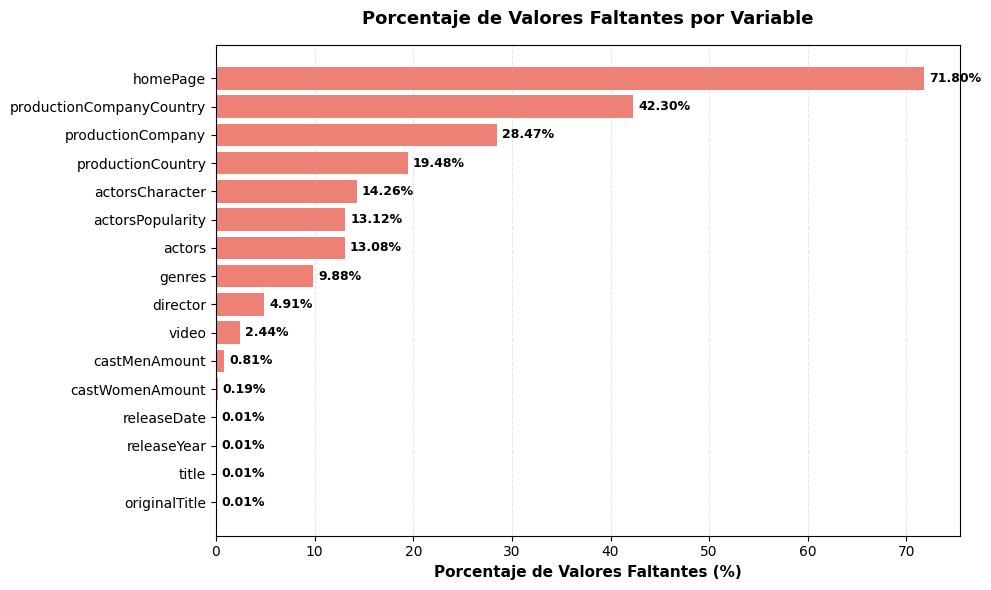

In [15]:
# Gráfico de barras horizontales de valores faltantes
if len(missing_with_values) > 0:
    fig, ax = plt.subplots(figsize=(10, 6))
    
    y_pos = np.arange(len(missing_with_values))
    ax.barh(y_pos, missing_with_values['Porcentaje'].values, color='#e74c3c', alpha=0.7)
    ax.set_yticks(y_pos)
    ax.set_yticklabels(missing_with_values['Variable'].values, fontsize=10)
    ax.invert_yaxis()
    
    ax.set_xlabel('Porcentaje de Valores Faltantes (%)', fontsize=11, fontweight='bold')
    ax.set_title('Porcentaje de Valores Faltantes por Variable', fontsize=13, fontweight='bold', pad=15)
    ax.grid(axis='x', alpha=0.3, linestyle='--')
    
    # Añadir valores en las barras
    for i, (idx, row) in enumerate(missing_with_values.iterrows()):
        ax.text(row['Porcentaje'] + 0.5, i, f"{row['Porcentaje']:.2f}%", 
                va='center', fontsize=9, fontweight='bold')
    
    plt.tight_layout()
    plt.show()


#### 4. Análisis de Valores Duplicados

In [16]:
# Análisis de duplicados
duplicados = datos.duplicated().sum()
porcentaje_duplicados = (duplicados / len(datos)) * 100

print("=" * 80)
print("ANÁLISIS DE VALORES DUPLICADOS")
print("=" * 80)
print(f"Número de filas duplicadas:     {duplicados:,}")
print(f"Porcentaje de duplicados:       {porcentaje_duplicados:.2f}%")
print(f"Filas únicas:                   {len(datos) - duplicados:,}")


ANÁLISIS DE VALORES DUPLICADOS
Número de filas duplicadas:     0
Porcentaje de duplicados:       0.00%
Filas únicas:                   19,883


#### 5. Resumen de Variables Clave

In [17]:
# Resumen de variables clave
print("=" * 80)
print("RESUMEN DE VARIABLES CLAVE")
print("=" * 80)

# Año de lanzamiento
if 'releaseYear' in datos.columns:
    print(f"\nAÑO DE LANZAMIENTO (releaseYear)")
    print(f"  Año mínimo:                 {datos['releaseYear'].min():.0f}")
    print(f"  Año máximo:                 {datos['releaseYear'].max():.0f}")

# Presupuesto
if 'budget' in datos.columns:
    print(f"\nPRESUPUESTO (budget)")
    print(f"  Promedio:                   ${datos['budget'].mean():,.2f}")
    print(f"  Mediana:                    ${datos['budget'].median():,.2f}")
    print(f"  Mínimo:                     ${datos['budget'].min():,.2f}")
    print(f"  Máximo:                     ${datos['budget'].max():,.2f}")

# Ingresos
if 'revenue' in datos.columns:
    print(f"\nINGRESOS (revenue)")
    print(f"  Promedio:                   ${datos['revenue'].mean():,.2f}")
    print(f"  Mediana:                    ${datos['revenue'].median():,.2f}")
    print(f"  Mínimo:                     ${datos['revenue'].min():,.2f}")
    print(f"  Máximo:                     ${datos['revenue'].max():,.2f}")

# Calificaciones
if 'voteAvg' in datos.columns:
    print(f"\nCALIFICACIONES (voteAvg)")
    print(f"  Promedio:                   {datos['voteAvg'].mean():.2f}")
    print(f"  Mediana:                    {datos['voteAvg'].median():.2f}")
    print(f"  Mínimo:                     {datos['voteAvg'].min():.2f}")
    print(f"  Máximo:                     {datos['voteAvg'].max():.2f}")

# Votos
if 'voteCount' in datos.columns:
    print(f"\nVOTOS (voteCount)")
    print(f"  Promedio:                   {datos['voteCount'].mean():,.0f}")
    print(f"  Mediana:                    {datos['voteCount'].median():,.0f}")
    print(f"  Máximo:                     {datos['voteCount'].max():,.0f}")

# Popularidad
if 'popularity' in datos.columns:
    print(f"\nPOPULARIDAD (popularity)")
    print(f"  Promedio:                   {datos['popularity'].mean():.2f}")
    print(f"  Mediana:                    {datos['popularity'].median():.2f}")
    print(f"  Máximo:                     {datos['popularity'].max():.2f}")

# Runtime
if 'runtime' in datos.columns:
    print(f"\nDURAÓN (runtime - minutos)")
    print(f"  Promedio:                   {datos['runtime'].mean():.2f} minutos")
    print(f"  Mediana:                    {datos['runtime'].median():.2f} minutos")
    print(f"  Mínimo:                     {datos['runtime'].min():.0f} minutos")
    print(f"  Máximo:                     {datos['runtime'].max():.0f} minutos")


RESUMEN DE VARIABLES CLAVE

AÑO DE LANZAMIENTO (releaseYear)
  Año mínimo:                 1902
  Año máximo:                 2026

PRESUPUESTO (budget)
  Promedio:                   $9,413,279.82
  Mediana:                    $0.00
  Mínimo:                     $0.00
  Máximo:                     $380,000,000.00

INGRESOS (revenue)
  Promedio:                   $28,792,133.68
  Mediana:                    $0.00
  Mínimo:                     $0.00
  Máximo:                     $2,847,246,203.00

CALIFICACIONES (voteAvg)
  Promedio:                   3.84
  Mediana:                    5.40
  Mínimo:                     0.00
  Máximo:                     10.00

VOTOS (voteCount)
  Promedio:                   676
  Mediana:                    6
  Máximo:                     30,788

POPULARIDAD (popularity)
  Promedio:                   26.25
  Mediana:                    8.50
  Máximo:                     11474.65

DURAÓN (runtime - minutos)
  Promedio:                   66.09 minutos
  M

#### 6. Análisis de Calidad de Datos

In [18]:
# Análisis de calidad de datos
print("=" * 80)
print("ANÁLISIS DE CALIDAD DE DATOS")
print("=" * 80)

# Películas con budget = 0
if 'budget' in datos.columns:
    budget_zero = (datos['budget'] == 0).sum()
    pct_budget_zero = (budget_zero / len(datos)) * 100
    print(f"\nPelículas con presupuesto = 0:")
    print(f"  Cantidad:                   {budget_zero:,}")
    print(f"  Porcentaje:                 {pct_budget_zero:.2f}%")

# Películas con revenue = 0
if 'revenue' in datos.columns:
    revenue_zero = (datos['revenue'] == 0).sum()
    pct_revenue_zero = (revenue_zero / len(datos)) * 100
    print(f"\nPelículas con ingresos = 0:")
    print(f"  Cantidad:                   {revenue_zero:,}")
    print(f"  Porcentaje:                 {pct_revenue_zero:.2f}%")

# Películas con runtime = 0
if 'runtime' in datos.columns:
    runtime_zero = (datos['runtime'] == 0).sum()
    pct_runtime_zero = (runtime_zero / len(datos)) * 100
    print(f"\nPelículas con duración = 0:")
    print(f"  Cantidad:                   {runtime_zero:,}")
    print(f"  Porcentaje:                 {pct_runtime_zero:.2f}%")

# Películas con voteCount = 0
if 'voteCount' in datos.columns:
    votecount_zero = (datos['voteCount'] == 0).sum()
    pct_votecount_zero = (votecount_zero / len(datos)) * 100
    print(f"\nPelículas con votos = 0:")
    print(f"  Cantidad:                   {votecount_zero:,}")
    print(f"  Porcentaje:                 {pct_votecount_zero:.2f}%")


ANÁLISIS DE CALIDAD DE DATOS

Películas con presupuesto = 0:
  Cantidad:                   13,281
  Porcentaje:                 66.80%

Películas con ingresos = 0:
  Cantidad:                   14,485
  Porcentaje:                 72.85%

Películas con duración = 0:
  Cantidad:                   2,951
  Porcentaje:                 14.84%

Películas con votos = 0:
  Cantidad:                   8,302
  Porcentaje:                 41.75%


## 1. ¿Cuáles son las 10 películas que contaron con más presupuesto?

## 2. ¿Cuáles son las 10 películas que más ingresos tuvieron?

## 3. ¿Cuál es la película que más votos tuvo?

## 4. ¿Cuál es la peor película de acuerdo a los votos de todos los usuarios?

## 5. ¿Cuántas películas se hicieron en cada año? ¿En qué año se hicieron más películas? Haga un gráfico de barras

## 6. ¿Cuál es el género principal de las 20 películas más recientes? ¿Cuál es el género principal que predomina en el conjunto de datos? Represéntelo usando un gráfico. ¿A qué género principal pertenecen las películas más largas?

## 7. ¿Las películas de qué genero principal obtuvieron mayores ganancias?

## 8. ¿La cantidad de actores influye en los ingresos de las películas? ¿Se han hecho películas con más actores en los últimos años?

## 9. ¿Es posible que la cantidad de hombres y mujeres en el reparto influya en la popularidad y los ingresos de las películas?

## 10. ¿Quiénes son los directores que hicieron las 20 películas mejor calificadas?

## 11. ¿Cómo se correlacionan los presupuestos con los ingresos? ¿Los altos presupuestos significan altos ingresos? Haga los gráficos que necesite, histograma, diagrama de dispersión

## 12. ¿Se asocian ciertos meses de lanzamiento con mejores ingresos?

## 13. ¿En qué meses se han visto los lanzamientos con mejores ingresos? ¿Cuantas películas, en promedio, se han lanzado por mes?

## 14. ¿Cómo se correlacionan las calificaciones con el éxito comercial?

## 15. ¿Qué estrategias de marketing, como videos promocionales o páginas oficiales, generan mejores resultados?

## 16. ¿La popularidad del elenco está directamente correlacionada con el éxito de taquilla?